# Practical 5.1

## Load required packages and read the dataset

In [118]:
from sklearn.cluster import KMeans # for k-means
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
import seaborn as sns

In [119]:
dataset = pd.read_csv('Samples220_Features17_CSC3062_RR_2021.csv', index_col=0)
dataset = dataset.T
dataset

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
CSC3062_108_2,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,0.899341,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350
CSC3062_109_4,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,0.063914,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753
CSC3062_110_4,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,0.135716,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406
CSC3062_112_2,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,0.453133,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524
CSC3062_113_2,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,0.892199,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSC3062_359_1,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,0.907254,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637
CSC3062_93_1,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,0.767178,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664
CSC3062_30009_1,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,0.874040,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584
CSC3062_30131_1,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,0.976368,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395


## Principal component analysis (PCA) dimension reduction and projection

In [120]:
pca = PCA(n_components=17)
df_pca = pca.fit(dataset)

In [121]:
df_pca.explained_variance_ratio_

array([0.46956109, 0.23434395, 0.15737967, 0.02542078, 0.02183197,
       0.01886441, 0.01690796, 0.01193762, 0.008846  , 0.00724166,
       0.0063761 , 0.0055515 , 0.00487005, 0.00404934, 0.00380815,
       0.00195404, 0.0010557 ])

Visualisation:a. Illustrate the plot of Cumulative Explained Variances vs. Number of Components. 

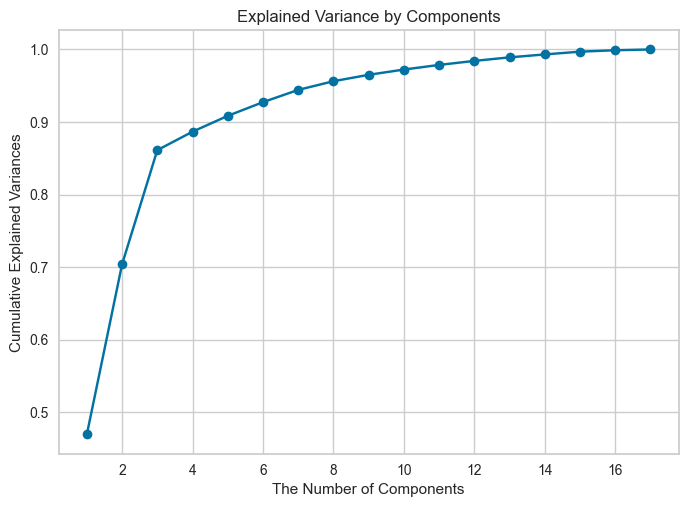

In [122]:
plt.plot(range(1,18),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')#plot variance_sum follow the principal
plt.title('Explained Variance by Components')
plt.xlabel("The Number of Components")
plt.ylabel("Cumulative Explained Variances" )
plt.show()

b. Illustrate a 3D PCA visualisation of samples by black colour.

In [123]:
pca2 = PCA(n_components = 3)
df_PCA_2 = pca2.fit_transform(dataset)
df_PCA_2

array([[ 1.15901575e+00,  1.96950322e-02,  2.34174015e-02],
       [-6.92616863e-01, -6.61979560e-01, -5.51249188e-01],
       [-7.29658239e-01, -5.66923122e-01, -4.36886708e-01],
       [ 1.40394393e+00, -4.98648300e-02, -1.08053332e-01],
       [ 1.29756012e+00, -8.86903329e-02,  2.53606658e-03],
       [-7.70294786e-01, -6.73123230e-01, -5.34833522e-01],
       [-6.19907414e-01,  2.21778437e-01,  9.22049645e-01],
       [-6.25052711e-01, -6.03227311e-01, -5.10528171e-01],
       [-4.16652725e-01, -5.40100749e-01, -3.41455640e-01],
       [-7.44905579e-01, -5.44741349e-01, -4.32060375e-01],
       [ 1.39293689e+00, -1.31296434e-01,  4.52134874e-02],
       [ 1.40800491e+00,  1.52322849e-01, -7.85863455e-02],
       [-6.99017448e-01, -7.11260872e-01, -5.07239648e-01],
       [-6.05397033e-01,  2.03006144e-01,  4.88228477e-01],
       [-7.10432004e-01, -6.85677624e-01, -5.29961549e-01],
       [ 1.39104064e+00, -1.19660545e-01,  2.11807484e-02],
       [-3.10293894e-01, -5.16835174e-02

In [124]:
finalDF = pd.DataFrame(data=df_PCA_2,
                    columns=['pc1','pc2','pc3'])

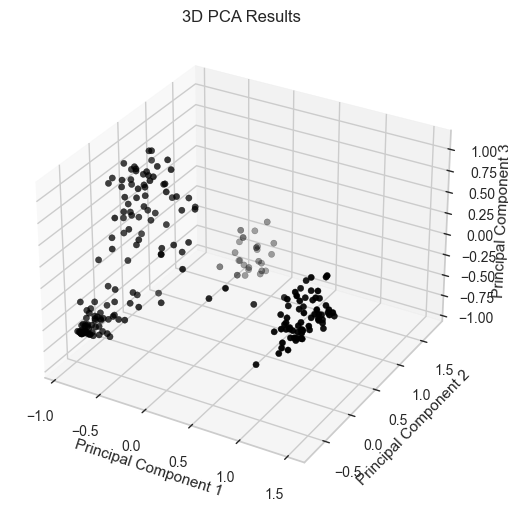

In [125]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDF['pc1'],finalDF['pc2'],finalDF['pc3'], c='black', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Results')
plt.show()

## Cluster Analysis

check n_cluster number

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

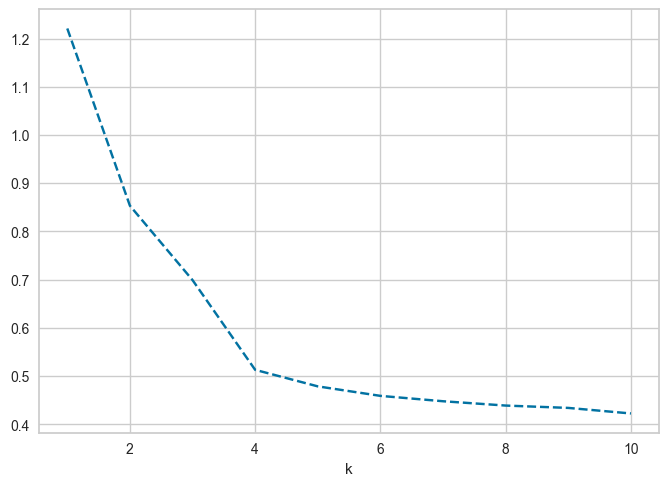

In [126]:
K = range(1,11)
meandistortions = []
for k in K:
	kmeans = KMeans(n_clusters=k,init='k-means++')
	kmeans.fit(dataset)
	#計算各個點分別到k個質心的距離，取其最小值作為其到所屬質心的距離，並計算這些點到各自所屬質心距離的平均距離
	meandistortions.append(
		sum(
			np.min(cdist(dataset,kmeans.cluster_centers_, 'euclidean'), axis=1)
		) / dataset.shape[0]
	)
# 繪製碎石圖
plt.plot(K, meandistortions, 'bx--')
plt.xlabel('k')
plt.show()

n_cluster = 4

In [127]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4,init = 'k-means++',random_state = 42,algorithm='elkan') # init='k-means++'可以加快迭代的速度
model.fit(dataset)
label = model.labels_#get the label
center = model.cluster_centers_ # center of the cluster
print(label)

[2 3 3 2 2 3 0 3 3 3 2 2 3 0 3 2 0 3 3 0 2 3 3 2 0 0 3 0 3 3 2 3 0 3 3 0 3
 3 3 3 2 3 3 2 3 3 3 2 2 0 2 0 2 0 0 0 2 0 2 3 0 2 2 3 3 3 2 3 3 0 2 0 3 2
 1 3 0 3 2 3 1 0 0 0 1 2 3 0 0 3 3 3 0 2 2 2 0 2 0 0 2 2 2 0 3 2 0 2 2 2 2
 0 2 3 2 2 0 2 0 0 2 2 0 0 3 2 0 1 2 0 2 0 2 3 2 2 2 0 0 2 2 3 3 3 3 2 2 2
 2 2 2 2 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 3 0 0 0 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1]


C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [128]:
df_pca_kmeans = pd.concat([dataset.reset_index(drop = True), pd.DataFrame(df_PCA_2)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_pca_kmeans['Subgroup'] = model.labels_  # kmeans_result.labels_
df_pca_kmeans

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,Component 1,Component 2,Component 3,Subgroup
0,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,...,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350,1.159016,0.019695,0.023417,2
1,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,...,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753,-0.692617,-0.661980,-0.551249,3
2,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,...,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406,-0.729658,-0.566923,-0.436887,3
3,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,...,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524,1.403944,-0.049865,-0.108053,2
4,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,...,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471,1.297560,-0.088690,0.002536,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,...,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637,-0.085691,1.708349,-0.542096,1
216,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,...,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664,-0.269692,1.707580,-0.638722,1
217,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,...,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584,-0.106380,1.130125,-0.170442,1
218,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,...,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395,-0.326782,1.752671,-0.486446,1


In [129]:
df_pca_kmeans.index = dataset.index


In [130]:
df_pca_kmeans

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,Component 1,Component 2,Component 3,Subgroup
CSC3062_108_2,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,...,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350,1.159016,0.019695,0.023417,2
CSC3062_109_4,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,...,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753,-0.692617,-0.661980,-0.551249,3
CSC3062_110_4,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,...,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406,-0.729658,-0.566923,-0.436887,3
CSC3062_112_2,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,...,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524,1.403944,-0.049865,-0.108053,2
CSC3062_113_2,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,...,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471,1.297560,-0.088690,0.002536,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSC3062_359_1,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,...,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637,-0.085691,1.708349,-0.542096,1
CSC3062_93_1,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,...,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664,-0.269692,1.707580,-0.638722,1
CSC3062_30009_1,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,...,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584,-0.106380,1.130125,-0.170442,1
CSC3062_30131_1,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,...,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395,-0.326782,1.752671,-0.486446,1


## Visualisation of projected dataset

In [144]:
finalDF.index = dataset.index
finalDF

,pc1,pc2,pc3
CSC3062_108_2,1.159016,0.019695,0.023417
CSC3062_109_4,-0.692617,-0.661980,-0.551249
CSC3062_110_4,-0.729658,-0.566923,-0.436887
CSC3062_112_2,1.403944,-0.049865,-0.108053
CSC3062_113_2,1.297560,-0.088690,0.002536
...,...,...,...
CSC3062_359_1,-0.085691,1.708349,-0.542096
CSC3062_93_1,-0.269692,1.707580,-0.638722
CSC3062_30009_1,-0.106380,1.130125,-0.170442
CSC3062_30131_1,-0.326782,1.752671,-0.486446


In [145]:
finalDF['Subgroup'] = model.labels_
finalDF

,pc1,pc2,pc3,Subgroup
CSC3062_108_2,1.159016,0.019695,0.023417,2
CSC3062_109_4,-0.692617,-0.661980,-0.551249,3
CSC3062_110_4,-0.729658,-0.566923,-0.436887,3
CSC3062_112_2,1.403944,-0.049865,-0.108053,2
CSC3062_113_2,1.297560,-0.088690,0.002536,2
...,...,...,...,...
CSC3062_359_1,-0.085691,1.708349,-0.542096,1
CSC3062_93_1,-0.269692,1.707580,-0.638722,1
CSC3062_30009_1,-0.106380,1.130125,-0.170442,1
CSC3062_30131_1,-0.326782,1.752671,-0.486446,1


In [146]:

finalDF['Subgroup'] = finalDF['Subgroup'].map({0:'Grp1',
                                                                     1:'Grp2',
                                                                     2:'Grp3',
                                                                     3:'Grp4'})


In [147]:
finalDF

,pc1,pc2,pc3,Subgroup
CSC3062_108_2,1.159016,0.019695,0.023417,Grp3
CSC3062_109_4,-0.692617,-0.661980,-0.551249,Grp4
CSC3062_110_4,-0.729658,-0.566923,-0.436887,Grp4
CSC3062_112_2,1.403944,-0.049865,-0.108053,Grp3
CSC3062_113_2,1.297560,-0.088690,0.002536,Grp3
...,...,...,...,...
CSC3062_359_1,-0.085691,1.708349,-0.542096,Grp2
CSC3062_93_1,-0.269692,1.707580,-0.638722,Grp2
CSC3062_30009_1,-0.106380,1.130125,-0.170442,Grp2
CSC3062_30131_1,-0.326782,1.752671,-0.486446,Grp2


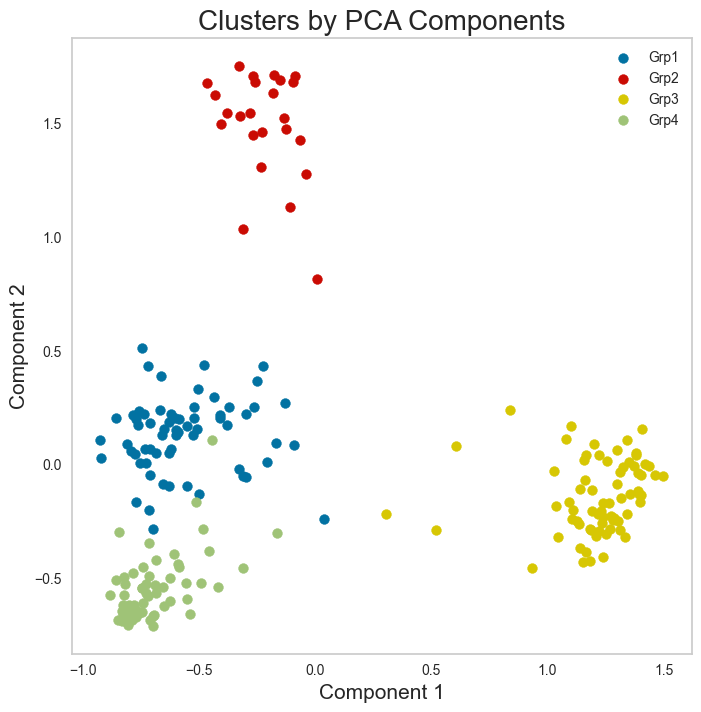

In [150]:
fig = plt.figure(figsize = (8,8)) #size of the plot
ax = fig.add_subplot(1,1,1) #Add an Axes to the current figure or retrieve an existing Axes.
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Clusters by PCA Components', fontsize=20)
targets = ['Grp1', 'Grp2', 'Grp3','Grp4']
colors = ['b','r','y','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Subgroup'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'pc1']
               , finalDF.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)#group point by targets
ax.grid()

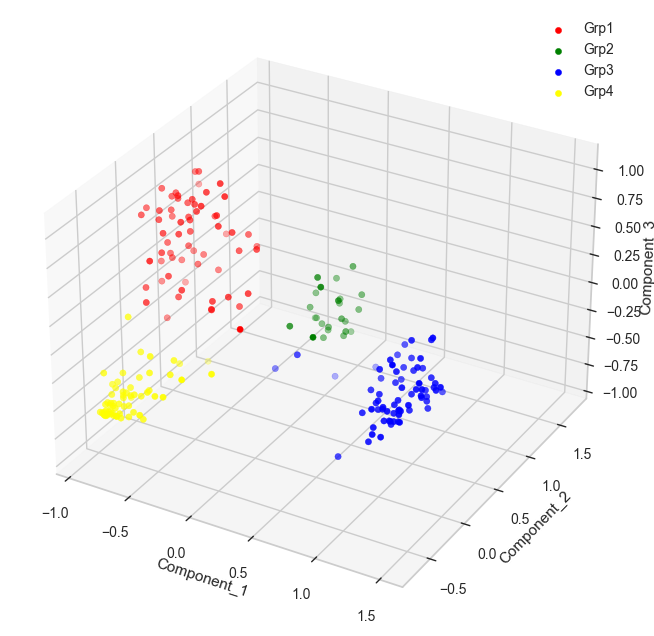

In [151]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
colors = {'Grp1': 'red', 'Grp2': 'green', 'Grp3': 'blue', 'Grp4': 'yellow'}

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color in colors.items():
    class_finalDf_New = finalDF[finalDF['Subgroup'] == label]
    ax.scatter(
        class_finalDf_New['pc1'],
        class_finalDf_New['pc2'],
        class_finalDf_New['pc3'],
        c=color,
        label=label
    )

# Set labels for the axes
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')
ax.set_zlabel('Component_3')

# Add a legend
ax.legend()

# Show the plot
plt.show()

## Quantitative performance evaluation and visualisation

In [135]:
from sklearn.metrics import silhouette_score
# Fit the KMeans model
model.fit_predict(df_PCA_2)
# Calculate Ave Silhoutte Score for 6 clusters
score = silhouette_score(df_PCA_2, model.labels_, metric='euclidean')
# Print the score
print('Silhouette ave Score (4 cluster analysis): %.3f' % score)

Silhouette ave Score (4 cluster analysis): 0.727


C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [136]:
silhouette_coefficients = []
# We need a least 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_PCA_2)
    score = silhouette_score(df_PCA_2, kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

[0.5522231385132409, 0.660699689708503, 0.7273647620248268, 0.6462988516301464, 0.5196389633892895, 0.4751275079440615, 0.47976386312795477, 0.4509524249528939]


C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


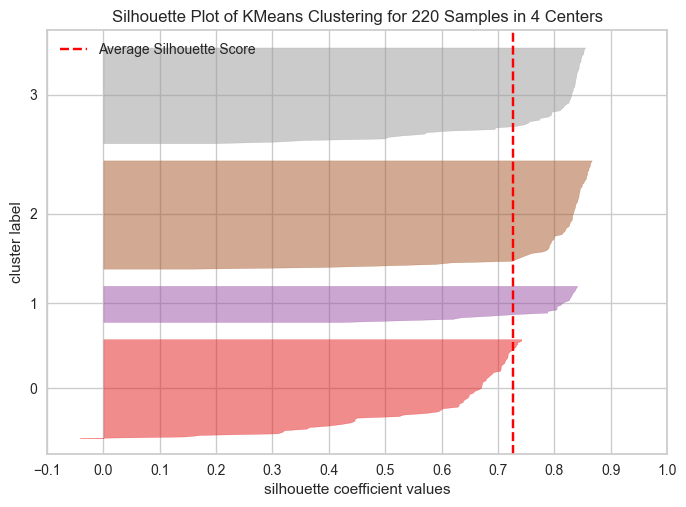

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 220 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [163]:
from yellowbrick.cluster import SilhouetteVisualizer
model2 = KMeans(n_clusters=4,random_state=42)
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(df_PCA_2)    # Fit the data to the visualizer
visualizer.poof() 

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


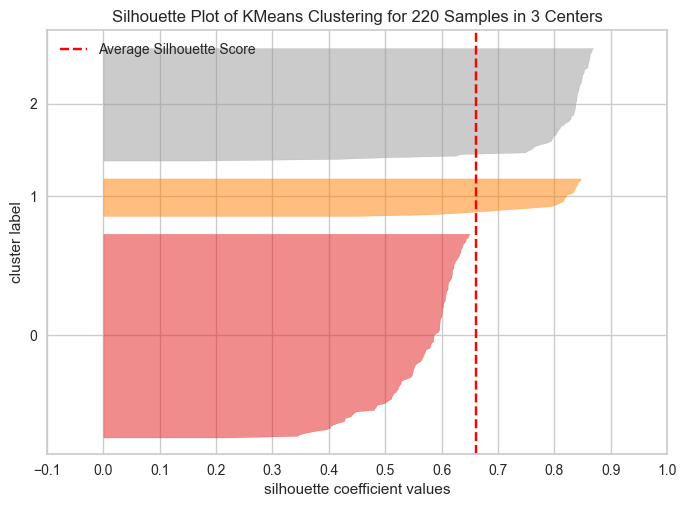

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 220 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [172]:
from yellowbrick.cluster import SilhouetteVisualizer
model2 = KMeans(3,random_state=42)
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(df_PCA_2)    # Fit the data to the visualizer
visualizer.poof()   

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract the last characters of the index; the last character is the reference subgroup
last_characters = dataset.index.str[-1]  

true_labels = [int(float(x)) for x in last_characters]  # convert the string label into number 

predicted_labels = model.labels_  # obtained from the kmeans clustering 

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Display confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[ 0  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 70  0  0]
 [63  0  0  2  0]
 [ 1  0  0 60  0]]

Accuracy: 0.43636363636363634


In [175]:
true_labels

[2,
 4,
 4,
 2,
 2,
 4,
 3,
 4,
 4,
 4,
 2,
 2,
 4,
 3,
 4,
 2,
 3,
 4,
 4,
 3,
 2,
 4,
 4,
 2,
 3,
 3,
 4,
 3,
 4,
 4,
 2,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 4,
 3,
 2,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 3,
 2,
 3,
 4,
 2,
 1,
 4,
 3,
 4,
 2,
 4,
 1,
 3,
 3,
 3,
 1,
 2,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 4,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 4,
 2,
 3,
 1,
 2,
 3,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [181]:
finalDf2 = pd.DataFrame(data=df_PCA_2,
                        columns=['Component 1','Component 2','Component 3'])
finalDf2.index = dataset.index
finalDf2['Subgroup'] = model.labels_
finalDf2['Subgroup'] = finalDf2['Subgroup'].map({0:'Grp1',
                                                                     1:'Grp2',
                                                                     2:'Grp3',
                                                                     3:'Grp4'})
finalDf2

,Component 1,Component 2,Component 3,Subgroup
CSC3062_108_2,1.159016,0.019695,0.023417,Grp3
CSC3062_109_4,-0.692617,-0.661980,-0.551249,Grp4
CSC3062_110_4,-0.729658,-0.566923,-0.436887,Grp4
CSC3062_112_2,1.403944,-0.049865,-0.108053,Grp3
CSC3062_113_2,1.297560,-0.088690,0.002536,Grp3
...,...,...,...,...
CSC3062_359_1,-0.085691,1.708349,-0.542096,Grp2
CSC3062_93_1,-0.269692,1.707580,-0.638722,Grp2
CSC3062_30009_1,-0.106380,1.130125,-0.170442,Grp2
CSC3062_30131_1,-0.326782,1.752671,-0.486446,Grp2


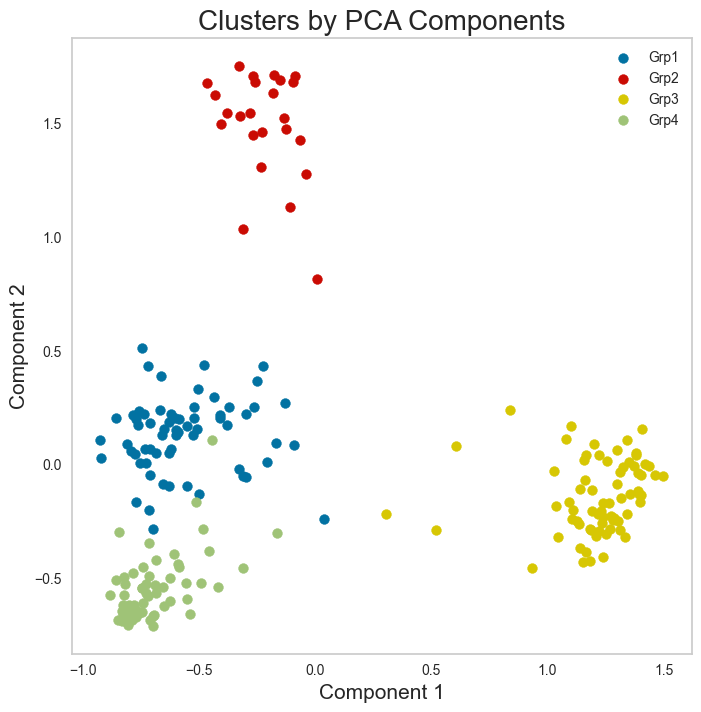

In [186]:
fig = plt.figure(figsize = (8,8)) #size of the plot
ax = fig.add_subplot(1,1,1) #Add an Axes to the current figure or retrieve an existing Axes.
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Clusters by PCA Components', fontsize=20)
targets = ['Grp1', 'Grp2', 'Grp3','Grp4']
colors = ['b','r','y','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['Subgroup'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'Component 1']
               , finalDf2.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
ax.legend(targets)#group point by targets
ax.grid()

OSError: [Errno 22] Invalid argument: 'dend_plot.png'

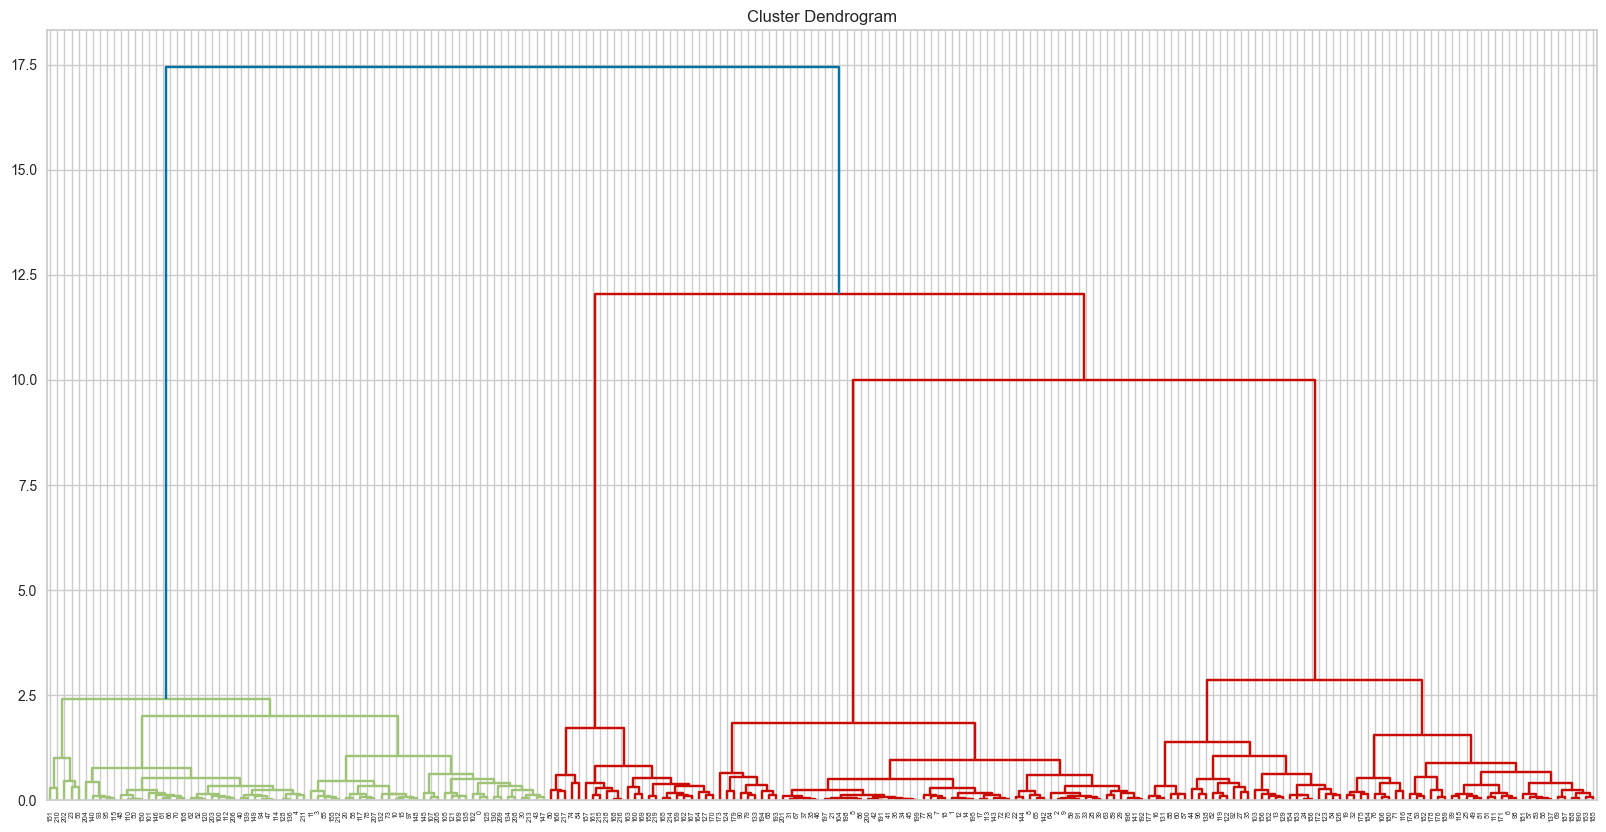

In [190]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))
plt.title("Cluster Dendrogram")
dend_plot = shc.dendrogram(shc.linkage(df_PCA_2, method='ward')) # Try different cluster proximity measure such as single
plt.savefig('dend_plot.png', format='png', bbox_inches='tight')

In [192]:
from sklearn.cluster import AgglomerativeClustering 
cluster_hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_hc.fit_predict(df_PCA_2)

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 3, 3, 1, 1, 3, 0, 3, 3, 3, 1, 1, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3,
       3, 1, 0, 0, 3, 0, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1,
       0, 3, 3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 3, 0, 1, 1, 3, 3, 3,
       1, 3, 3, 0, 1, 0, 3, 1, 2, 3, 0, 3, 1, 3, 2, 0, 0, 0, 2, 1, 3, 0,
       0, 3, 3, 3, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 3, 1, 0, 1, 1, 1,
       1, 0, 1, 3, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 2, 1, 0, 1, 0,
       1, 3, 1, 1, 1, 0, 0, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int64)

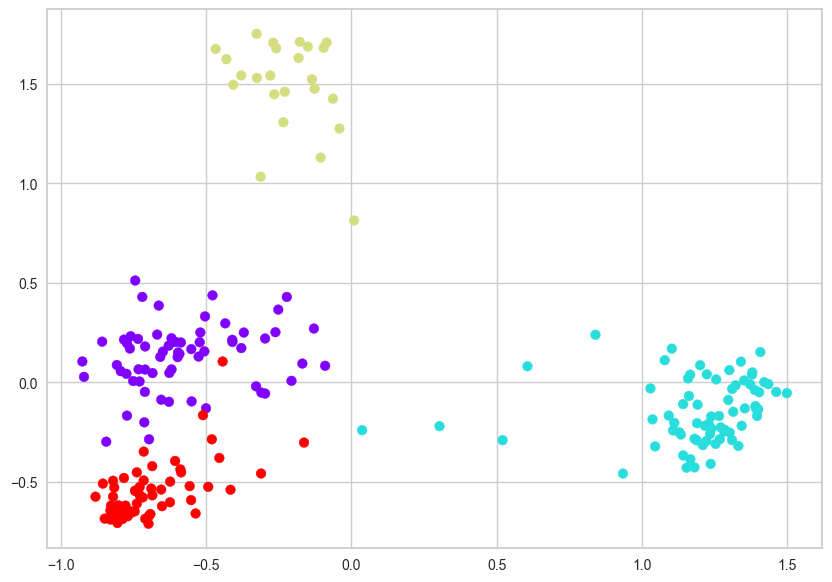

In [194]:
plt.figure(figsize=(10, 7))
plt.scatter(df_PCA_2[:,0], df_PCA_2[:,1], c=cluster_hc.labels_, cmap='rainbow') 